# Installation of Packages

In [1]:
# !pip install -q tensorflow_datasets

# !pip install datasets

# !pip install keras_cv

# !pip install keras_hub

# Download Dataset from external source

# Importing packages

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt



import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import  Input, Resizing, RandomFlip, RandomRotation

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import Accuracy

from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras.utils import  to_categorical, get_file, load_img

from tensorflow.keras import layers



#from tensorflow.keras.datasets import mnist

import tensorflow_datasets as tfds

#from datasets import load_dataset

from keras.applications import EfficientNetB0

#import keras_cv

#import keras_hub

# Custom Functions

# Reading Data

In [3]:
dataset_name = "stanford_dogs"

(ds_train, ds_test), ds_info = tfds.load(name=dataset_name, split=["train", "test"], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.AV2LKG_0.2.0/stanford_dogs-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.AV2LKG_0.2.0/stanford_dogs-test.tfrecord*...:   0…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


# Data Inspection / Visualization

In [4]:
ds_info.features['label']

ClassLabel(shape=(), dtype=int64, num_classes=120)

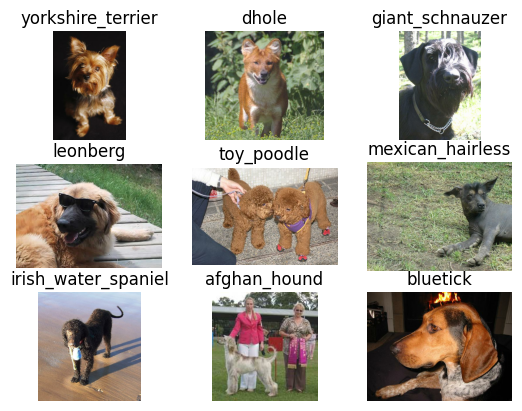

In [5]:
# Image sizes are not consistent

for i, (image, index) in enumerate(ds_train.take(9)):

  plt.subplot(3,3,i+1)

  plt.imshow(image)

  plt.title(ds_info.features['label'].int2str(index).split("-")[1])

  plt.axis("off")

# Data Preprocessing

In [6]:
ds_train = ds_train.map(lambda x, y: (Resizing(224,224)(x), y))

In [7]:
ds_test = ds_test.map(lambda x, y: (Resizing(224,224)(x), y))

In [8]:
augmentation = Sequential([RandomRotation(factor=0.2), RandomFlip()])

In [9]:
ds_train = ds_train.map(lambda x, y: (augmentation(x), to_categorical(y, 120)), num_parallel_calls=tf.data.AUTOTUNE).batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [10]:
ds_test = ds_test.map(lambda x, y: (x, to_categorical(y, 120)), num_parallel_calls=tf.data.AUTOTUNE).batch(32, drop_remainder=True)

# Data Postprocessing

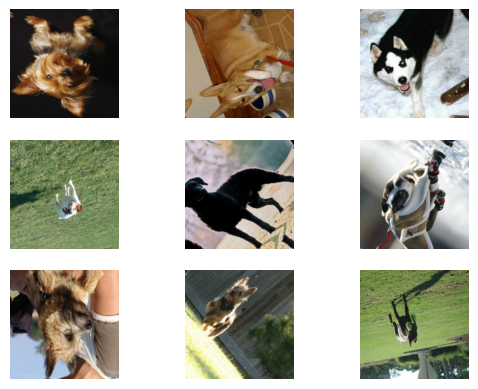

In [11]:
# Image sizes are not consistent

for i, (image, label) in enumerate(ds_train.take(9)):

    plt.subplot(3,3,i+1)

    plt.imshow(image[0].numpy()/255)

    #plt.title(ds_info.features['label'].int2str(index).split("-")[1])

    plt.axis("off")


# Model

In [12]:
model = EfficientNetB0(

    include_top=True,

    weights=None,

    classes=120,

    input_shape=(224, 224, 3),

)

model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 4,203,291 (16.03 MB)

 Trainable params: 4,161,268 (15.87 MB)

 Non-trainable params: 42,023 (164.16 KB)

# Compile

In [13]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=[Accuracy()])

# Fit

In [ ]:
history = model.fit(ds_train, epochs=5, validation_data=ds_test)

# Evaluation

# Inference